# 2D Cell Image Segmentation

### by Jason Nie   nie9@illinois.edu

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline


## Watershed

(312, 252, 3)


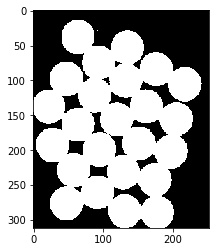

In [6]:
img = cv2.imread('data/coins.jpg')
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

(312, 252)
16.778297233581544
(312, 252)
(312, 252)


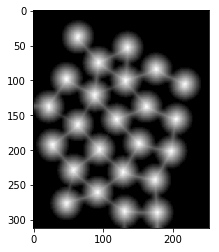

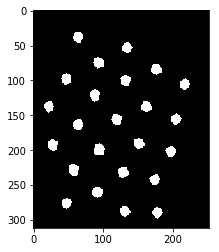

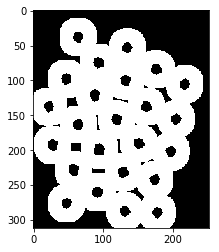

In [7]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

print(dist_transform.shape)
print(ret)
print(sure_fg.shape)
print(unknown.shape)

plt.imshow(dist_transform, cmap='gray')
plt.show()

plt.imshow(sure_fg, cmap='gray')
plt.show()

plt.imshow(unknown, cmap='gray')
plt.show()

(312, 252)


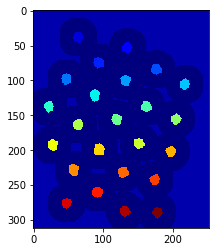

In [8]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

print(markers.shape)
plt.imshow(markers, cmap='jet')
plt.show()


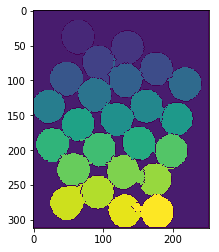

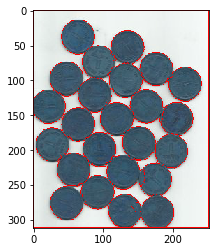

In [9]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

plt.imshow(img)
plt.show()

## Otsu's Thresholding

(346, 361)
uint8


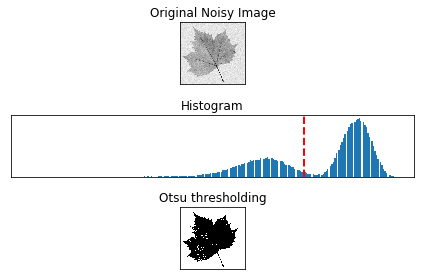

In [15]:
img = cv2.imread('data/noisy_leaf.jpg', 0)
print(img.shape) 
#ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
#blur = cv2.GaussianBlur(img, (5,5), 0)
#ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 

print(img.dtype)
plt.subplot(3,1,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


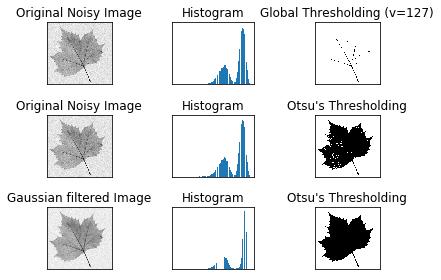

In [14]:
img = cv2.imread('data/noisy_leaf.jpg', 0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## cell image

In [2]:
dir_path = './data/c3/'
for filename in os.listdir(dir_path):
    print(filename)
    img_path = os.path.join(dir_path, filename)
    img = np.asarray(Image.open(img_path))    # (512, 512)

Snap-800-Image Export-81_c3_ORG.tif
Snap-795-Image Export-78_c3_ORG.tif
Snap-799-Image Export-80_c3_ORG.tif
Snap-810-Image Export-85_c3_ORG.tif
Snap-809-Image Export-84_c3_ORG.tif
Snap-808-Image Export-83_c3_ORG.tif
Snap-807-Image Export-82_c3_ORG.tif


(512, 512)


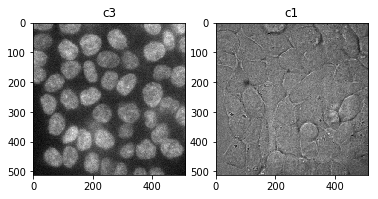

In [3]:
img_path_c3 = './data/c3/Snap-799-Image Export-80_c3_ORG.tif'
img_c3 = np.asarray(Image.open(img_path_c3))
print(img_c3.shape)
plt.subplot(1, 2, 1)
plt.title('c3')
plt.imshow(img_c3, cmap='gray')
#plt.show()

img_path_c1 = './data/c1/Snap-799-Image Export-80_c1_ORG.tif'
img_c1 = np.asarray(Image.open(img_path_c1))
plt.subplot(1, 2, 2)
plt.title('c1')
plt.imshow(img_c1, cmap='gray')
plt.tight_layout
plt.show()

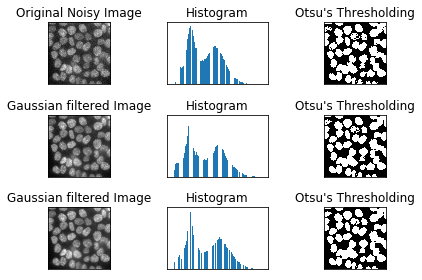

In [4]:
# Otsu's thresholding
ret1,th1 = cv2.threshold(img_c3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur1 = cv2.GaussianBlur(img_c3,(3,3),0)
ret2,th2 = cv2.threshold(blur1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur2 = cv2.GaussianBlur(img_c3,(5,5),0)
blur2 = cv2.normalize(blur2, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
ret3,th3 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img_c3, 0, th1,
          blur1, 0, th2,
          blur2, 0, th3]
titles = ['Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

float32
(512, 512)
22.653955078124998
(512, 512)
(512, 512)


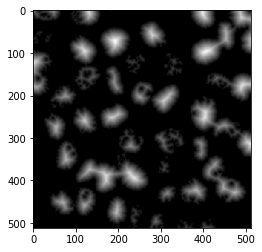

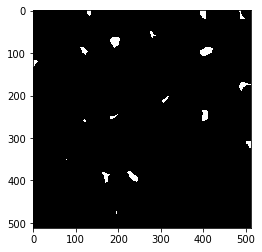

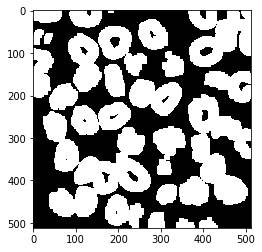

In [5]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(th1,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
print(dist_transform.dtype)
#dist_transform = dist_transform.astype(np.uint8)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

print(dist_transform.shape)
print(ret)
print(sure_fg.shape)
print(unknown.shape)

plt.imshow(dist_transform, cmap='gray')
plt.show()

plt.imshow(sure_fg, cmap='gray')
plt.show()

plt.imshow(unknown, cmap='gray')
plt.show()

int32


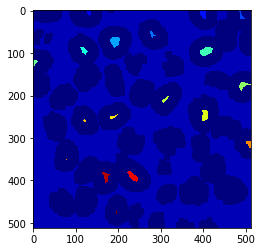

In [6]:
"""
Markers: -1: boundary
          1: background
          N: object N
"""

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
print(markers.dtype)

plt.imshow(markers, cmap='jet')
plt.show()

(512, 512)
(512, 512, 3)
(512, 512)


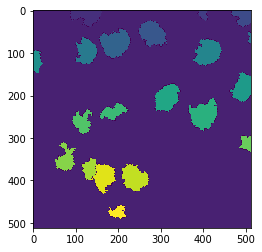

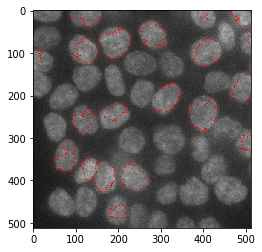

In [7]:
#markers = np.uint8(markers)
print(img_c3.shape)
img_color = cv2.cvtColor(img_c3,cv2.COLOR_GRAY2BGR)
print(img_color.shape)
markers = cv2.watershed(img_color,markers)
print(markers.shape)
img_color[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

plt.imshow(img_color)
plt.show()

In [10]:
print(markers[110])

[-1 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  8  8 -1  1  1  1  1 -1  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  6  6  6  6  6  6  6  6  6  6  6
  6 -1  1  1  1  1 -1  6  6 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1